### Stock Market Prediction And Forecasting Using Stacked LSTM

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('china.csv')

In [3]:
df.head(10)

,Time Interval,Close,Net Chg,Open,High,Low,Tick Count,Volume
0,Summary,3379.036,339.012,3036.386,3465.493,2646.811,1270440.0,N.A.
1,30DEC2019_00:00:00.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20:15 - 20:45,3042.413,2.389,3036.386,3042.413,3034.328,303.0,N.A.
3,20:45 - 21:15,3040.201,-2.212,3042.413,3044.264,3037.198,469.0,N.A.
4,21:15 - 21:45,3037.930,-2.271,3040.129,3043.792,3034.271,469.0,N.A.
5,21:45 - 22:15,3034.573,-3.357,3037.930,3039.345,3033.481,469.0,N.A.
6,22:15 - 22:45,3038.260,3.687,3034.946,3039.506,3034.804,469.0,N.A.
7,22:45 - 23:15,3038.260,0.000,3038.260,3038.260,3038.260,470.0,N.A.
8,23:15 - 23:45,3038.260,0.000,3038.260,3038.260,3038.260,470.0,N.A.
9,23:45 - 00:15,3034.584,-3.676,3038.260,3038.415,3034.136,469.0,N.A.


In [4]:
df=df.dropna()

In [5]:
df.head(10)

,Time Interval,Close,Net Chg,Open,High,Low,Tick Count,Volume
0,Summary,3379.036,339.012,3036.386,3465.493,2646.811,1270440.0,N.A.
2,20:15 - 20:45,3042.413,2.389,3036.386,3042.413,3034.328,303.0,N.A.
3,20:45 - 21:15,3040.201,-2.212,3042.413,3044.264,3037.198,469.0,N.A.
4,21:15 - 21:45,3037.930,-2.271,3040.129,3043.792,3034.271,469.0,N.A.
5,21:45 - 22:15,3034.573,-3.357,3037.930,3039.345,3033.481,469.0,N.A.
6,22:15 - 22:45,3038.260,3.687,3034.946,3039.506,3034.804,469.0,N.A.
7,22:45 - 23:15,3038.260,0.000,3038.260,3038.260,3038.260,470.0,N.A.
8,23:15 - 23:45,3038.260,0.000,3038.260,3038.260,3038.260,470.0,N.A.
9,23:45 - 00:15,3034.584,-3.676,3038.260,3038.415,3034.136,469.0,N.A.
11,00:15 - 00:45,3039.398,4.814,3034.635,3039.744,3030.594,470.0,N.A.


In [6]:
# df.index=[i for i in range(len(df))] or df.reset_index(inplace=True) to make indices in 1,2,3 order
df.head(10)
# print(df.loc[0])

,Time Interval,Close,Net Chg,Open,High,Low,Tick Count,Volume
0,Summary,3379.036,339.012,3036.386,3465.493,2646.811,1270440.0,N.A.
2,20:15 - 20:45,3042.413,2.389,3036.386,3042.413,3034.328,303.0,N.A.
3,20:45 - 21:15,3040.201,-2.212,3042.413,3044.264,3037.198,469.0,N.A.
4,21:15 - 21:45,3037.930,-2.271,3040.129,3043.792,3034.271,469.0,N.A.
5,21:45 - 22:15,3034.573,-3.357,3037.930,3039.345,3033.481,469.0,N.A.
6,22:15 - 22:45,3038.260,3.687,3034.946,3039.506,3034.804,469.0,N.A.
7,22:45 - 23:15,3038.260,0.000,3038.260,3038.260,3038.260,470.0,N.A.
8,23:15 - 23:45,3038.260,0.000,3038.260,3038.260,3038.260,470.0,N.A.
9,23:45 - 00:15,3034.584,-3.676,3038.260,3038.415,3034.136,469.0,N.A.
11,00:15 - 00:45,3039.398,4.814,3034.635,3039.744,3030.594,470.0,N.A.


In [7]:
df1=df.reset_index()['Close']

In [8]:
df1

0       3379.036
1       3042.413
2       3040.201
3       3037.930
4       3034.573
          ...   
2900    3386.783
2901    3390.892
2902    3379.596
2903    3380.257
2904    3379.036
Name: Close, Length: 2905, dtype: float64

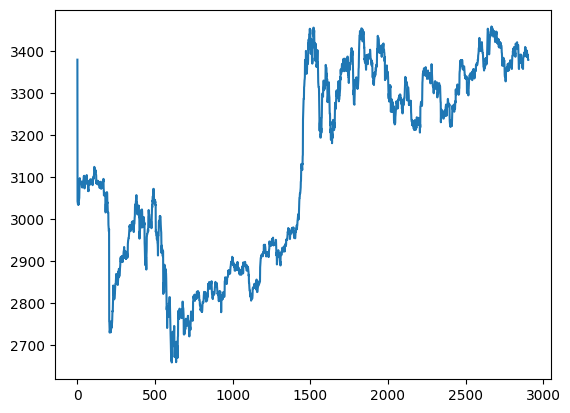

In [9]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [10]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [11]:
import numpy as np

In [12]:
df1

0       3379.036
1       3042.413
2       3040.201
3       3037.930
4       3034.573
          ...   
2900    3386.783
2901    3390.892
2902    3379.596
2903    3380.257
2904    3379.036
Name: Close, Length: 2905, dtype: float64

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [14]:
print(df1)

[[0.90120371]
 [0.47960864]
 [0.47683828]
 ...
 [0.90190506]
 [0.90273292]
 [0.90120371]]


In [15]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [16]:
training_size,test_size

(1888, 1017)

In [17]:
train_data

array([[0.90120371],
       [0.47960864],
       [0.47683828],
       ...,
       [0.93081479],
       [0.92319253],
       [0.91674755]])

In [18]:
test_data

array([[0.91221252],
       [0.90131141],
       [0.90131141],
       ...,
       [0.90190506],
       [0.90273292],
       [0.90120371]])

In [19]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [20]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [21]:
print(X_train.shape), print(y_train.shape)

(1787, 100)
(1787,)


(None, None)

In [22]:
print(X_test.shape), print(ytest.shape)

(916, 100)
(916,)


(None, None)

In [23]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [24]:
print(X_train.shape)

(1787, 100, 1)


In [25]:
# pip install tensorflow

In [26]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [ ]:
model.summary()

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
train_predict.shape

In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['data set','train','test'])
plt.show()

In [ ]:
len(test_data)

In [ ]:
x_input=test_data[len(test_data)-100:].reshape(1,-1)
x_input.shape


In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

In [ ]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(df1)

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[len(df1)-100:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

In [ ]:
plt.plot(df3)